Let us consider the following set of points following roughly a linear trend
$
(y = ax + b)$ with $x \in [-5, 5]$

In [31]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge

In [34]:
#creating a list of 11 values randomly
x = []
y = []
for i in range(-5,6):
  list_x = i
  rnd_number = random.uniform(-3,3)
  list_y = i + rnd_number
  x.append(list_x)
  y.append(list_y)

Q1: Use sklearn (from sklearn import linear_model) to provide a linear
regression on the previous 11 points. And display the predictions on 1000 values
of x taken incrementally in [-5, 5] and display the results (the 11 previous
points and the regression line connecting the regression points).

In [35]:
pred = []
# Create list with 1010 points in interval x:[-5,5]
for i in range(-50,51):       
  list_pred = 0.1*i
  pred.append(list_pred)

In [36]:
# Transform lists to np arrays
x = np.array(x).reshape(-1, 1)
pred = np.array(pred).reshape(-1, 1)

In [37]:
#computing linear regression
regr = linear_model.LinearRegression()
regr.fit(x,y)
#prediction for pred values
pred_y=regr.predict(pred)

# Calculating value of linear regressor at 11 points in interval x:[-5,5]
new_y = regr.predict(x)

Root Mean Squared Error: 0.7810797397786132


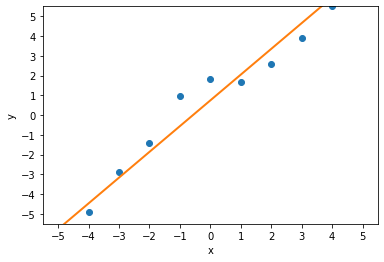

In [38]:
# Print rmse value
rmse = math.sqrt(mean_squared_error(new_y, y))
print('Root Mean Squared Error:', rmse)

# Set axes and labels
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-5.5,5.5)
ax.set_ylim(-5.5,5.5)
ax.xaxis.set_ticks(range(-5,6))
ax.yaxis.set_ticks(range(-5,6))
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.annotate(u'$RMSE$ = %.1f' % rmse, xy=(0.15,0.85), xycoords='axes fraction')
# Plot as orange line the regression line at interval
plt.plot(pred,pred_y,color='C1',linestyle='solid',linewidth=2)
# Plot as blue points the original database
plt.scatter(x, y,color='C0')

Q2: Use again sklearn (from sklearn import linear_model) to provide
a linear regression on the previous 21 points. And display the predictions on
1000 values of x taken incrementally in [-5; 5] and display the results (the 11
previous points and the regression line connecting the regression points).

In [39]:
pred = []
# Create list with 1010 points in interval x:[-5,5]
for i in range(-50,51):
  list_pred = 0.1*i
  pred.append(list_pred)
    
pred = np.linspace(-5,6,100)

In [40]:
#creating a list of 21 values randomly
x = []
y = []
#for i in range(-5,6):
for i in np.linspace(-5,6,21):
  list_x = i
  rnd_number = random.uniform(-3,3)
  list_y = list_x + rnd_number
  x.append(list_x)
  y.append(list_y)

In [41]:
# Transform lists to np arrays
x = np.array(x).reshape(-1, 1)
pred = np.array(pred).reshape(-1, 1)

In [42]:
#computing linear regression
regr = linear_model.LinearRegression()
regr.fit(x,y)
#prediction for pred values
pred_y=regr.predict(pred)

# Calculating value of linear regressor at 11 points in interval x:[-5,5]
new_y = regr.predict(x)

Root Mean Squared Error: 1.7041032653478163


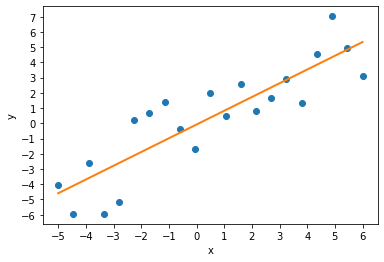

In [43]:
# Print rmse value
rmse = math.sqrt(mean_squared_error(new_y, y))
print('Root Mean Squared Error:', rmse)

# Set axes and labels
fig = plt.figure()
ax = fig.add_subplot()
#ax.set_xlim(-10.5,10.5)
#ax.set_ylim(-10.5,10.5)
ax.xaxis.set_ticks(range(-10,10))
ax.yaxis.set_ticks(range(-10,10))
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.annotate(u'$RMSE$ = %.1f' % rmse, xy=(0.15,0.85), xycoords='axes fraction')
# Plot as orange line the regression line at interval
plt.plot(pred,pred_y,color='C1',linestyle='solid',linewidth=2)
# Plot as blue points the original database
plt.scatter(x, y,color='C0')

Q3: Use sklearn (from sklearn.kernel_ridge import KernelRidge) to
provide a kernel ridge regression on the previous 21 points using a polynomial
kernel $K(x1,x2) = (\gamma x^T_1x2+c)^d$, where $\gamma$ and c are parameters and d is the
degree of the polynomial. You will vary $d = 2,3,4,5 $And display the predictions
on 1000 values of x taken incrementally in [-5; 5] and display the results (the
21 previous points and the 1000 regression points).

In [44]:
# Initialize lists and set random seed
list_x = []
list_y = []
list_x_pred = []
list_y_real = []

In [46]:
# Create database with 21 points following quasi-lienar relation in interval x:[-5,5]
for i in range(-10,11):
    x = i*0.5
    rnd_number= random.uniform(-1,1)
    y = (x+4)*(x+1)*(x-1)*(x-3) + rnd_number
    list_x.append(x)
    list_y.append(y)
    #print(x,y)

In [47]:
# Create list with 1060 points in interval x:[-5,5]
for i in range(-50,51):
    x = 0.1*i
    list_x_pred.append(x)
    list_y_real.append((x+4)*(x+1)*(x-1)*(x-3))

In [48]:
# Transform lists to np arrays
list_x = np.array(list_x).reshape(-1, 1)
list_x_pred = np.array(list_x_pred).reshape(-1, 1)

In [49]:
# Do kernel ridge regression using database with 21 points
list_y_pred = []
short_list_y_pred = []
rmse_list = []
# For each of the tested polynomial degree values
for degree_value in [2,3,4,5]:
    krr = KernelRidge(alpha=1.0,kernel='polynomial',degree=degree_value)
    krr.fit(list_x,list_y)
    list_y_pred.append(krr.predict(list_x_pred))
    new_y = krr.predict(list_x)
    short_list_y_pred.append(new_y)
    # Print rmse value
    rmse = math.sqrt(mean_squared_error(new_y, list_y))
    rmse_list.append(rmse)
    print('############################')
    print('Degree:', degree_value)
    print('Root Mean Squared Error: %.1f' % rmse)

############################
Degree: 2
Root Mean Squared Error: 59.8
############################
Degree: 3
Root Mean Squared Error: 55.9
############################
Degree: 4
Root Mean Squared Error: 0.7
############################
Degree: 5
Root Mean Squared Error: 0.7


Text(0.15, 0.85, '$RMSE$ = 0.7')

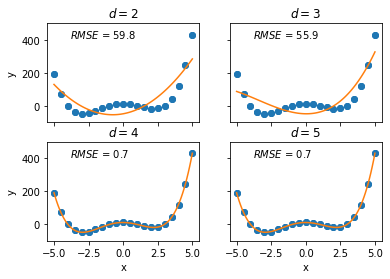

In [50]:
# Set axes and labels
fig, axs = plt.subplots(2, 2)
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# Subplot top-left
axs[0, 0].scatter(list_x, list_y,color='C0')
axs[0, 0].plot(list_x_pred,list_y_pred[0],color='C1')
axs[0, 0].set_title(r'$d = 2$')
axs[0, 0].set_xlim(-5.5,5.5)
axs[0, 0].set_ylim(-100,500)
axs[0, 0].annotate(u'$RMSE$ = %.1f' % rmse_list[0], xy=(0.15,0.85), xycoords='axes fraction')
# Subplot top-right
axs[0, 1].scatter(list_x, list_y,color='C0')
axs[0, 1].plot(list_x_pred,list_y_pred[1], color='C1')
axs[0, 1].set_title(r'$d = 3$')
axs[0, 1].set_xlim(-5.5,5.5)
axs[0, 1].set_ylim(-100,500)
axs[0, 1].annotate(u'$RMSE$ = %.1f' % rmse_list[1], xy=(0.15,0.85), xycoords='axes fraction')
# Subplot bottom-left
axs[1, 0].scatter(list_x, list_y,color='C0')
axs[1, 0].plot(list_x_pred,list_y_pred[2], color='C1')
axs[1, 0].set_title(r'$d = 4$')
axs[1, 0].set_xlim(-5.5,5.5)
axs[1, 0].set_ylim(-100,500)
axs[1, 0].annotate(u'$RMSE$ = %.1f' % rmse_list[2], xy=(0.15,0.85), xycoords='axes fraction')
# Subplot bottom-right
axs[1, 1].scatter(list_x, list_y,color='C0')
axs[1, 1].plot(list_x_pred,list_y_pred[3], color='C1')
axs[1, 1].set_title(r'$d = 5$')
axs[1, 1].set_xlim(-5.5,5.5)
axs[1, 1].set_ylim(-100,500)
axs[1, 1].annotate(u'$RMSE$ = %.1f' % rmse_list[3], xy=(0.15,0.85), xycoords='axes fraction')